In [1]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


### 1. Import libaries and data 

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import warnings # This is a library that handles warnings.


warnings.filterwarnings("ignore")# Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature.

plt.style.use('fivethirtyeight')

In [3]:
# This option ensures the charts created are displayed without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = '/Users/bente/careerfoundry /exercise_6/02 Data/prepared data'

In [5]:
# Concatenate the directory path and file name
file_path = os.path.join(path,'LAST_CLEANED.csv')

# Read the CSV file
df = pd.read_csv(file_path)

### 2. Data overview 

In [6]:
df.head()

,name,year,continent,least_developed,life_expect,population,CO2_emiss,health_spend(% of GDP),electr_consum(kWh/capita),forest_area,gdp_per_capita,internet_users,military_spend,open_defecation,drinking_water_user,adult_obesity,beer_per_capita,life_exp_category
0,Albania,2000,Europe,0,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431,Middle Life Expectancy
1,Albania,2001,Europe,0,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995,Middle Life Expectancy
2,Albania,2002,Europe,0,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697,Middle Life Expectancy
3,Albania,2003,Europe,0,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830,Middle Life Expectancy
4,Albania,2004,Europe,0,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617,High Life Expectancy


In [7]:
df.shape

(2373, 18)

In [8]:
df.columns

Index(['name', 'year', 'continent', 'least_developed', 'life_expect',
       'population', 'CO2_emiss', 'health_spend(% of GDP)',
       'electr_consum(kWh/capita)', 'forest_area', 'gdp_per_capita',
       'internet_users', 'military_spend', 'open_defecation',
       'drinking_water_user', 'adult_obesity', 'beer_per_capita',
       'life_exp_category'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       2373 non-null   object 
 1   year                       2373 non-null   int64  
 2   continent                  2373 non-null   object 
 3   least_developed            2373 non-null   int64  
 4   life_expect                2373 non-null   float64
 5   population                 2373 non-null   int64  
 6   CO2_emiss                  2373 non-null   float64
 7   health_spend(% of GDP)     2373 non-null   float64
 8   electr_consum(kWh/capita)  2373 non-null   float64
 9   forest_area                2373 non-null   float64
 10  gdp_per_capita             2373 non-null   float64
 11  internet_users             2373 non-null   float64
 12  military_spend             2373 non-null   float64
 13  open_defecation            2373 non-null   float

In [10]:
#setting year column as index 

df.set_index('year', inplace=True)

In [11]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

# Display the DataFrame
print(df)

                     name      continent  least_developed  life_expect  \
year                                                                     
2000              Albania         Europe                0    73.955000   
2001              Albania         Europe                0    74.288000   
2002              Albania         Europe                0    74.579000   
2003              Albania         Europe                0    74.828000   
2004              Albania         Europe                0    75.039000   
2005              Albania         Europe                0    75.228000   
2006              Albania         Europe                0    75.423000   
2007              Albania         Europe                0    75.646000   
2008              Albania         Europe                0    75.912000   
2009              Albania         Europe                0    76.221000   
2010              Albania         Europe                0    76.562000   
2011              Albania         Euro

In [12]:
df.head()

,name,continent,least_developed,life_expect,population,CO2_emiss,health_spend(% of GDP),electr_consum(kWh/capita),forest_area,gdp_per_capita,internet_users,military_spend,open_defecation,drinking_water_user,adult_obesity,beer_per_capita,life_exp_category
year,,,,,,,,,,,,,,,,,
2000,Albania,Europe,0,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431,Middle Life Expectancy
2001,Albania,Europe,0,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995,Middle Life Expectancy
2002,Albania,Europe,0,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697,Middle Life Expectancy
2003,Albania,Europe,0,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830,Middle Life Expectancy
2004,Albania,Europe,0,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617,High Life Expectancy


In [13]:
type(df)

pandas.core.frame.DataFrame

### 3. Creating a subset

In [14]:
df_albania  = df[df["name"]=="Albania"]
df_albania.columns

Index(['name', 'continent', 'least_developed', 'life_expect', 'population',
       'CO2_emiss', 'health_spend(% of GDP)', 'electr_consum(kWh/capita)',
       'forest_area', 'gdp_per_capita', 'internet_users', 'military_spend',
       'open_defecation', 'drinking_water_user', 'adult_obesity',
       'beer_per_capita', 'life_exp_category'],
      dtype='object')

In [15]:
# List of columns to remove
columns_to_remove = ["name", "continent", "least_developed","life_exp_category"]

# Drop the columns from the DataFrame
df_albania = df_albania.drop(columns=columns_to_remove)

### 4. Plotting the data 

<Figure size 1500x500 with 0 Axes>

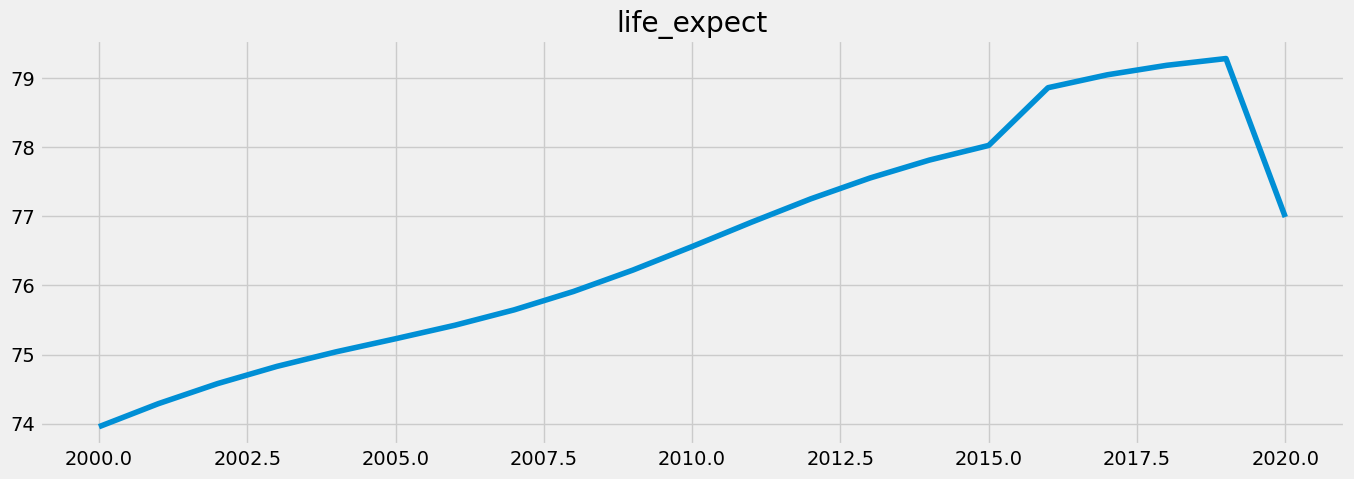

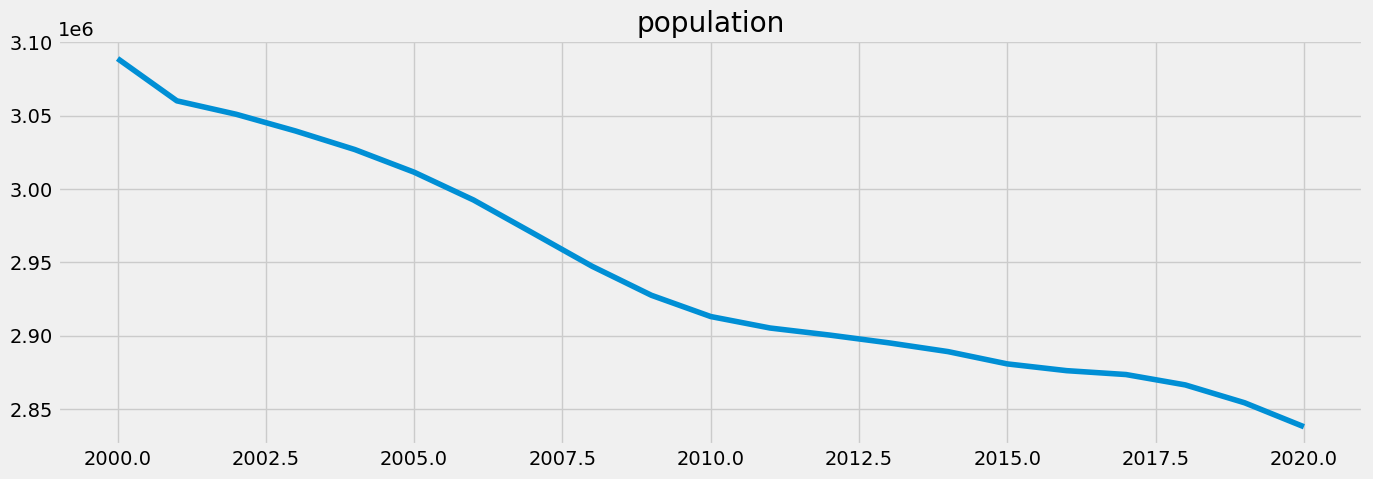

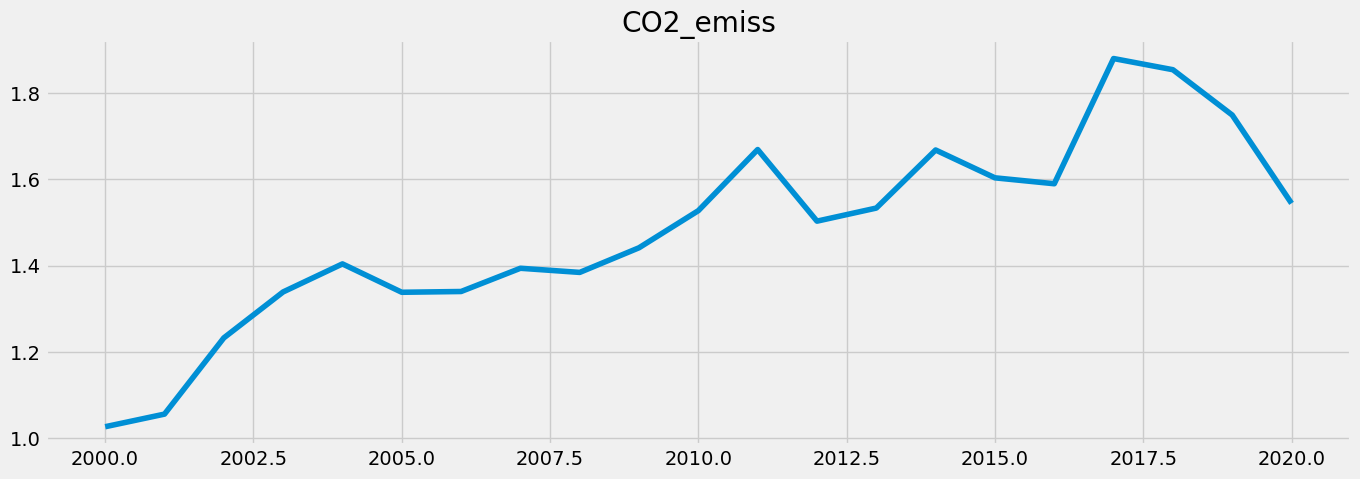

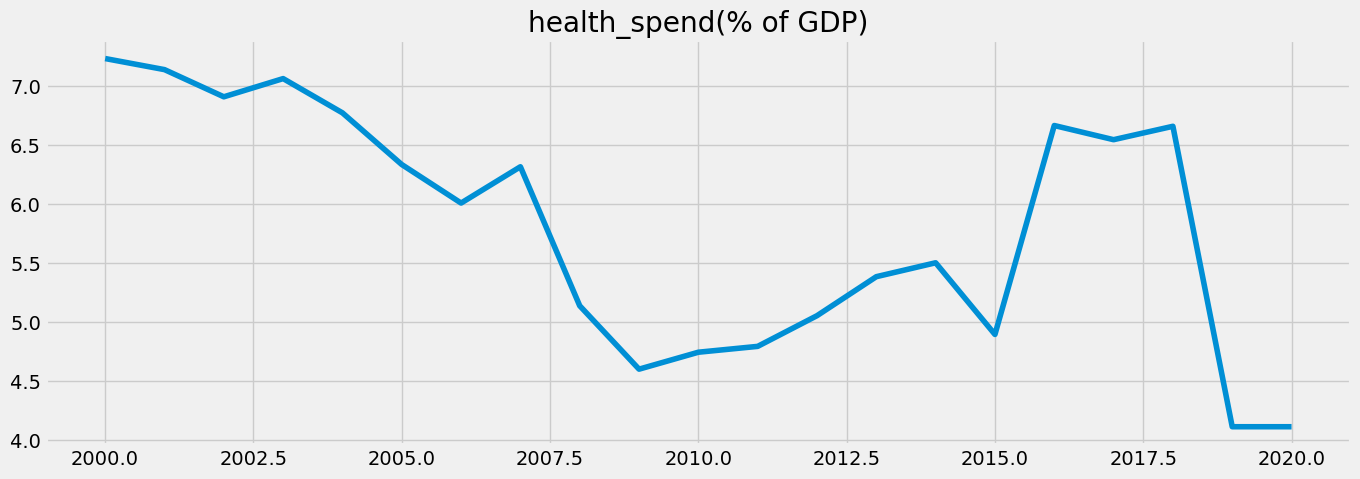

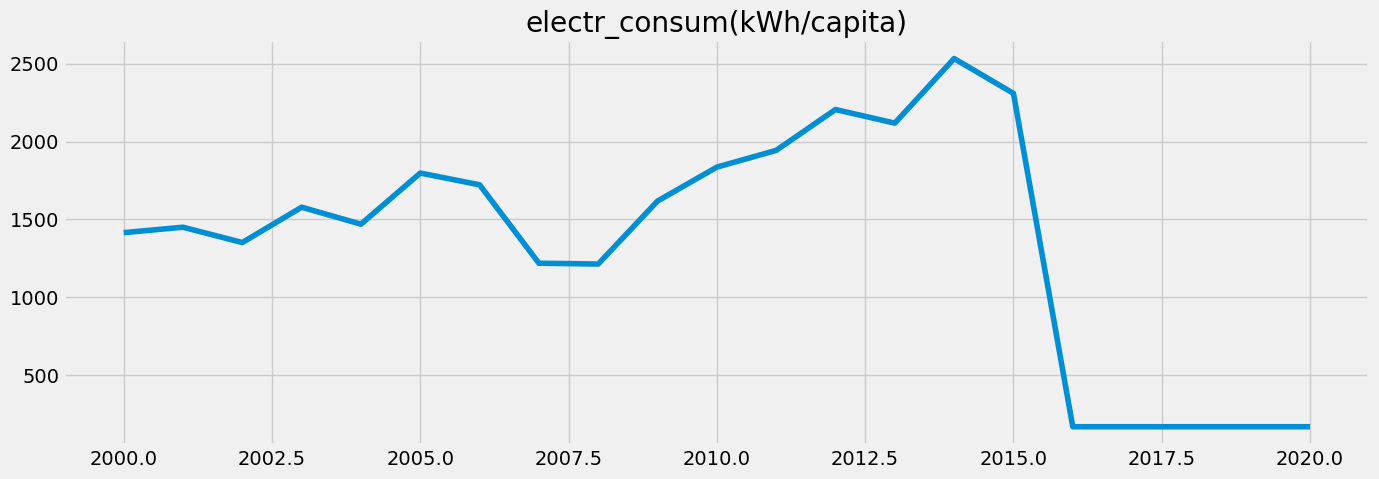

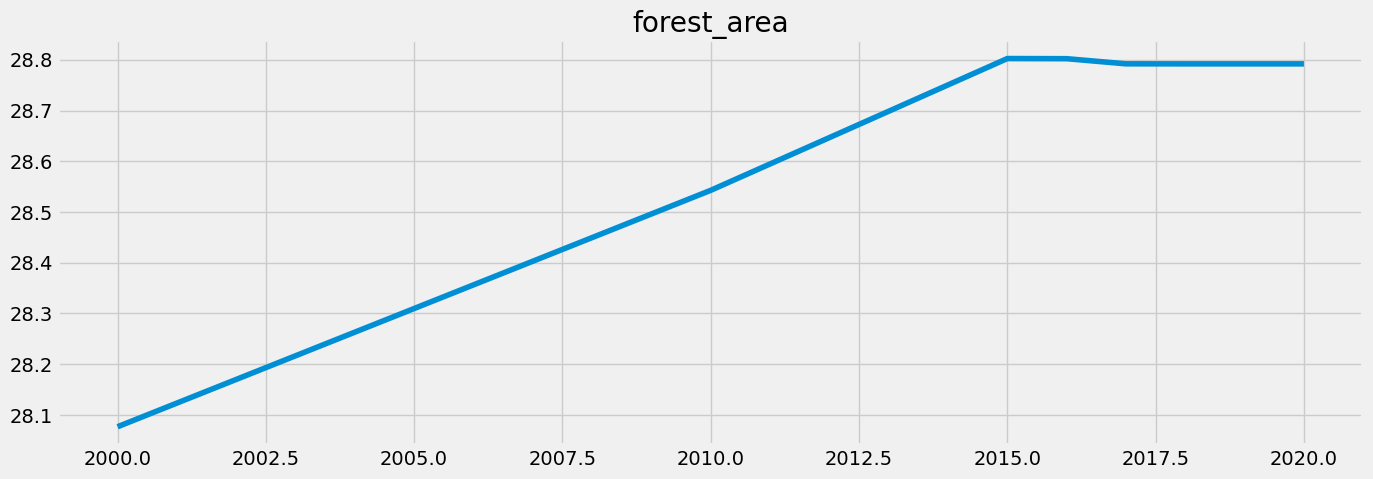

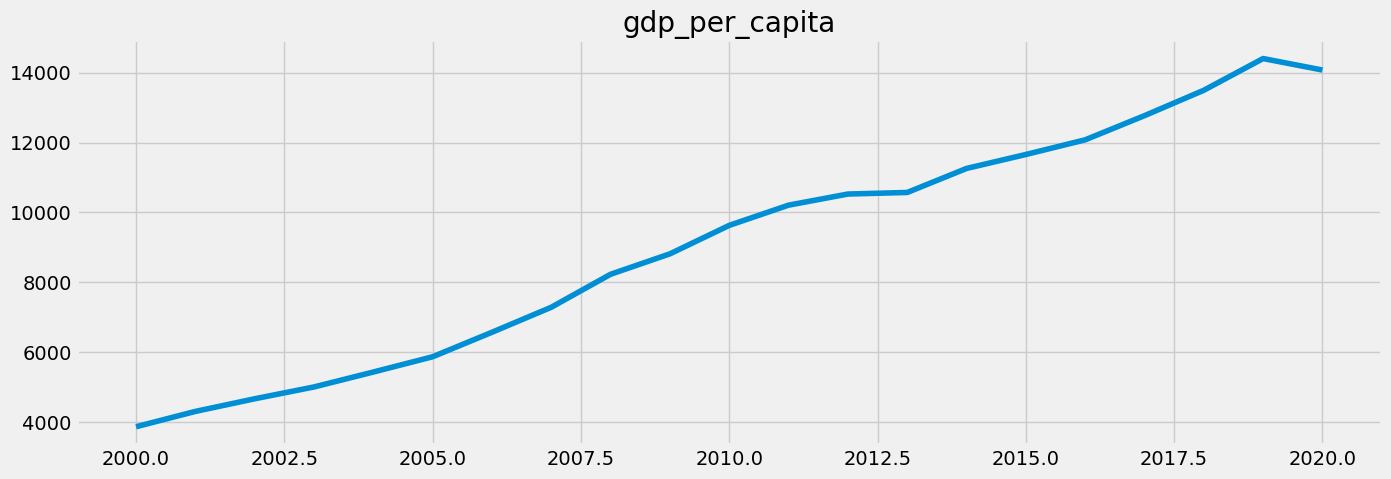

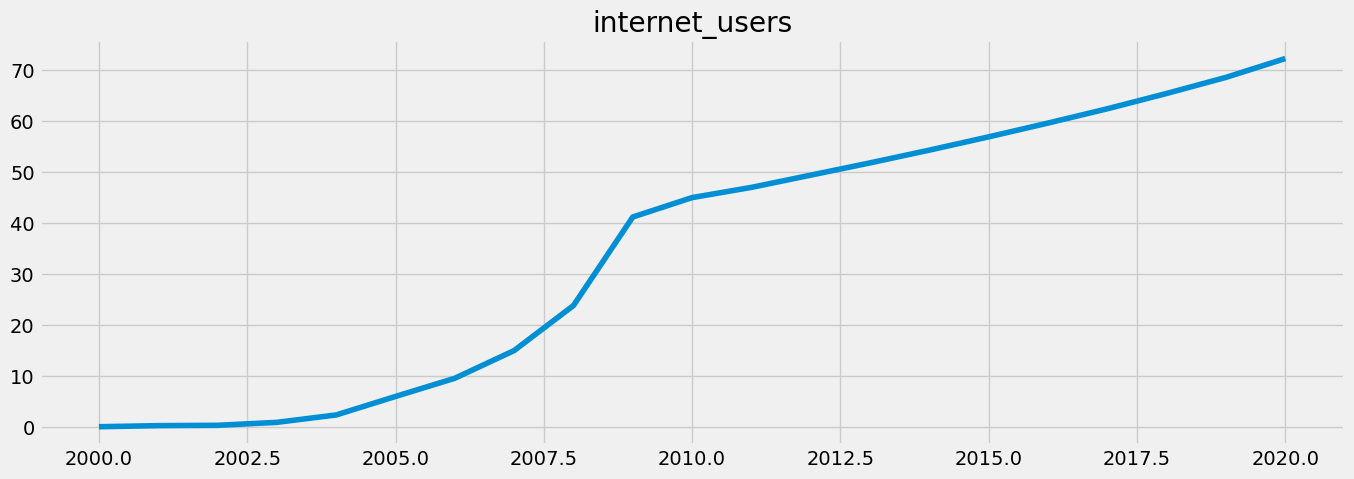

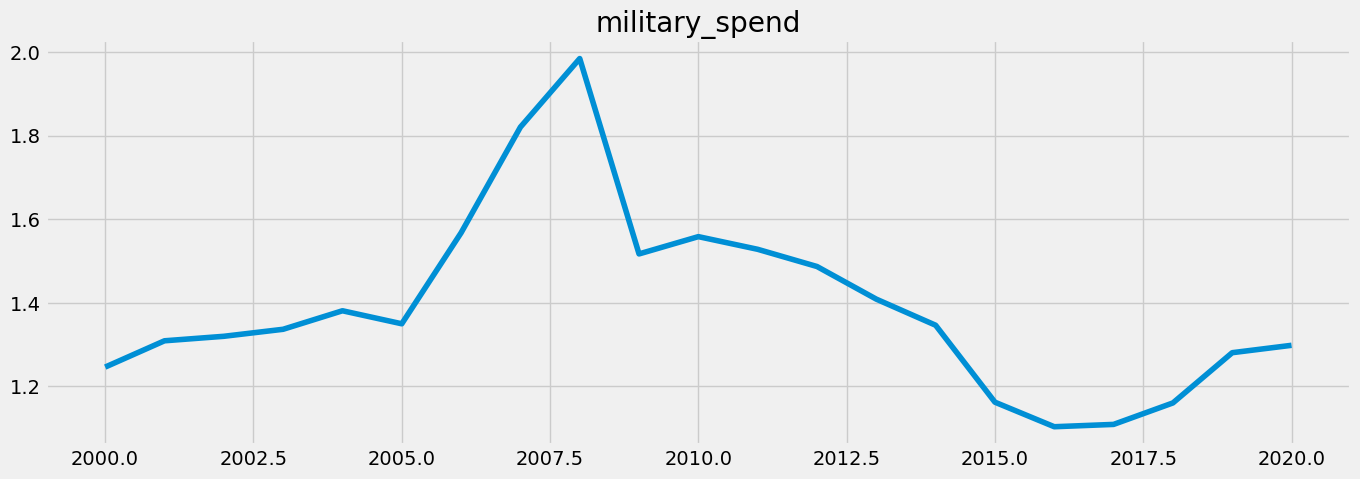

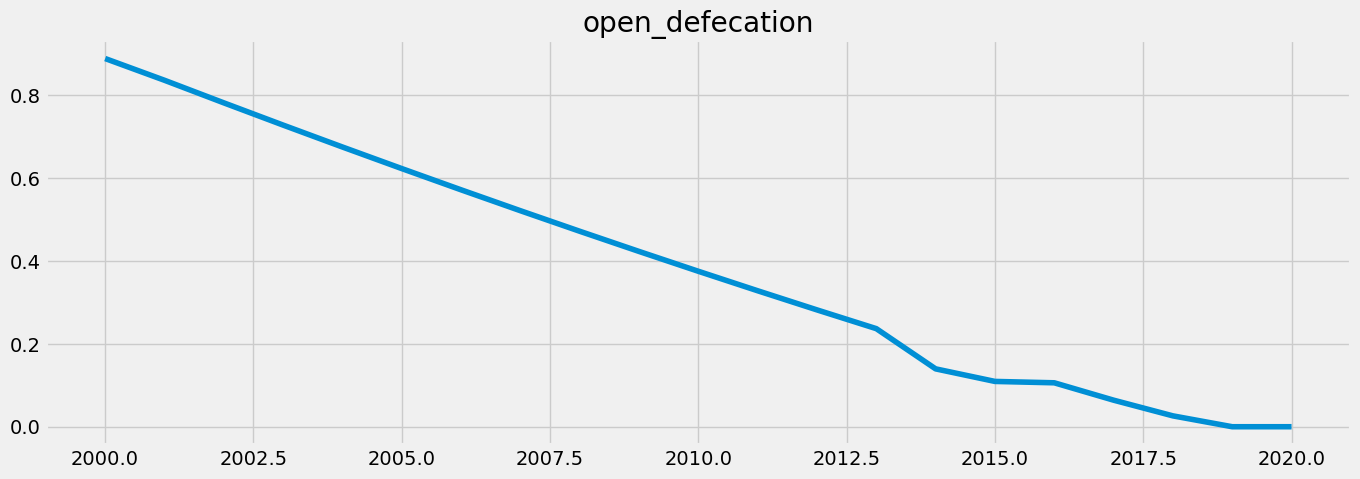

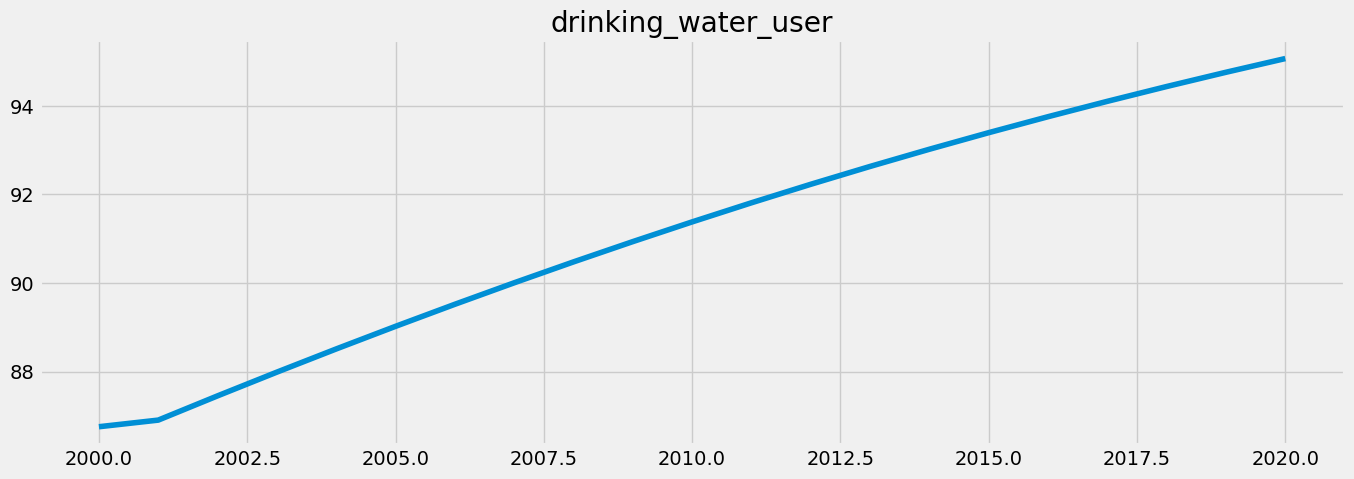

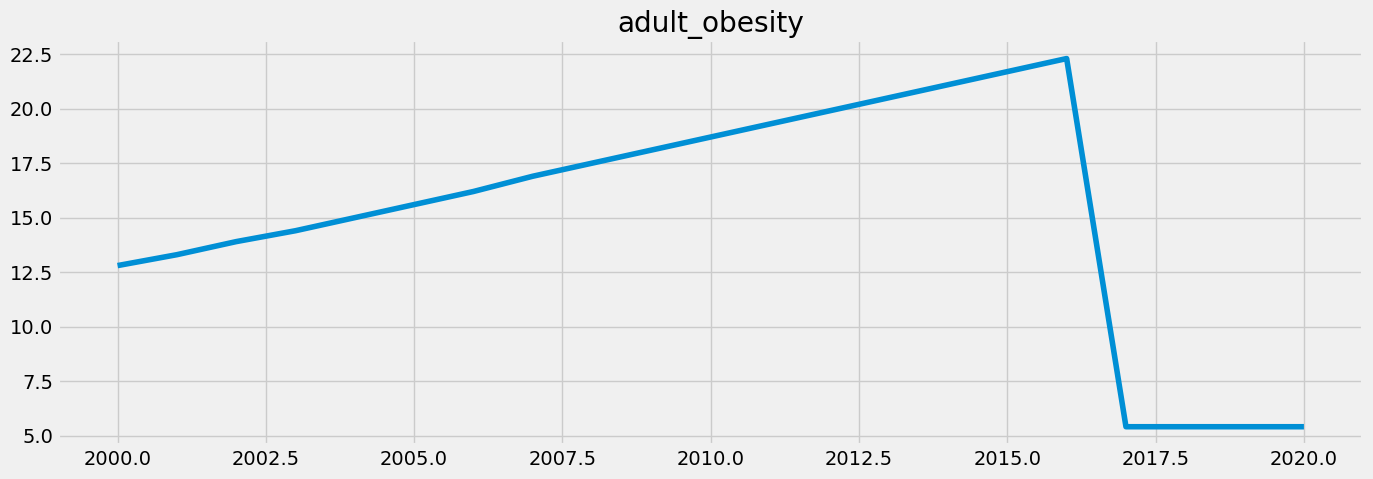

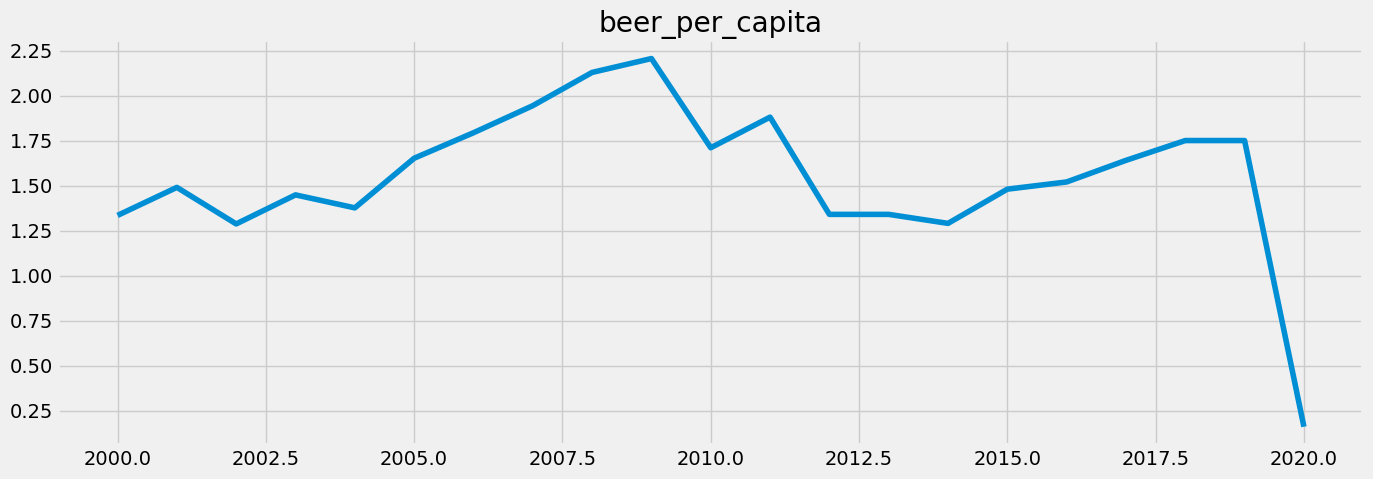

In [16]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

for column in df_albania.columns:
    plt.figure(figsize=(15,5), dpi=100)
    plt.plot(df_albania[column])
    plt.title(column)

I am not sure about the visualizations, the strong cut for the adult_obesity and electricity and consum in the year 2016 is suspicious for errors
in the data I would say. The strong cut for beer_per_capita, co2 emissions could be due to the corona pandemie. 

In [17]:
df_germany  = df[df["name"]=="Germany"]
df_germany.columns

Index(['name', 'continent', 'least_developed', 'life_expect', 'population',
       'CO2_emiss', 'health_spend(% of GDP)', 'electr_consum(kWh/capita)',
       'forest_area', 'gdp_per_capita', 'internet_users', 'military_spend',
       'open_defecation', 'drinking_water_user', 'adult_obesity',
       'beer_per_capita', 'life_exp_category'],
      dtype='object')

In [18]:
# List of columns to remove
columns_to_remove = ["name", "continent", "least_developed","life_exp_category"]

# Drop the columns from the DataFrame
df_germany = df_germany.drop(columns=columns_to_remove)

<Figure size 1500x500 with 0 Axes>

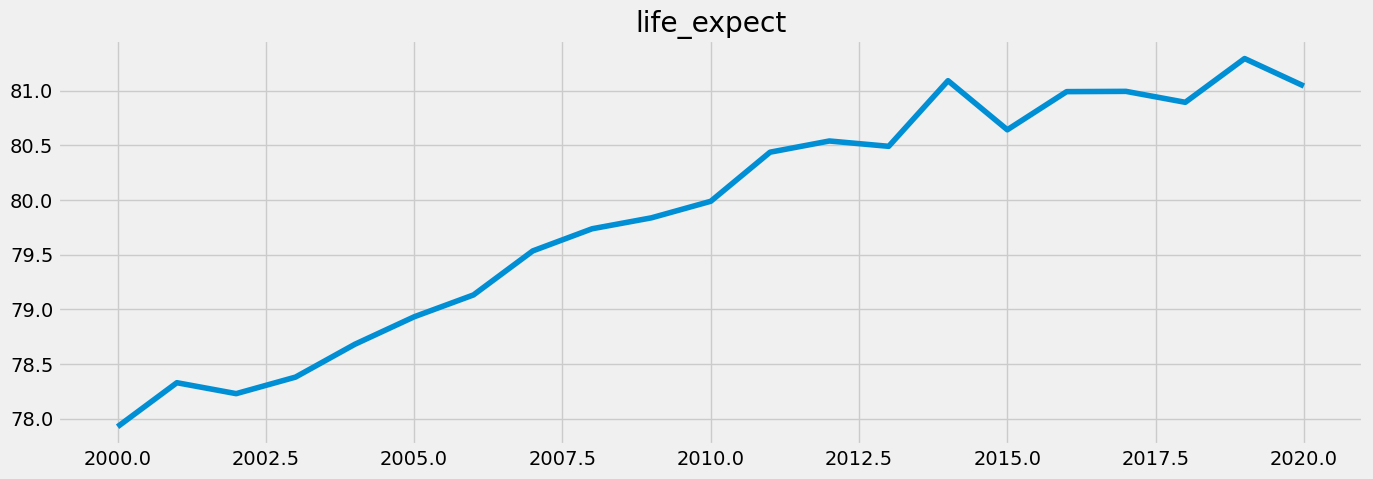

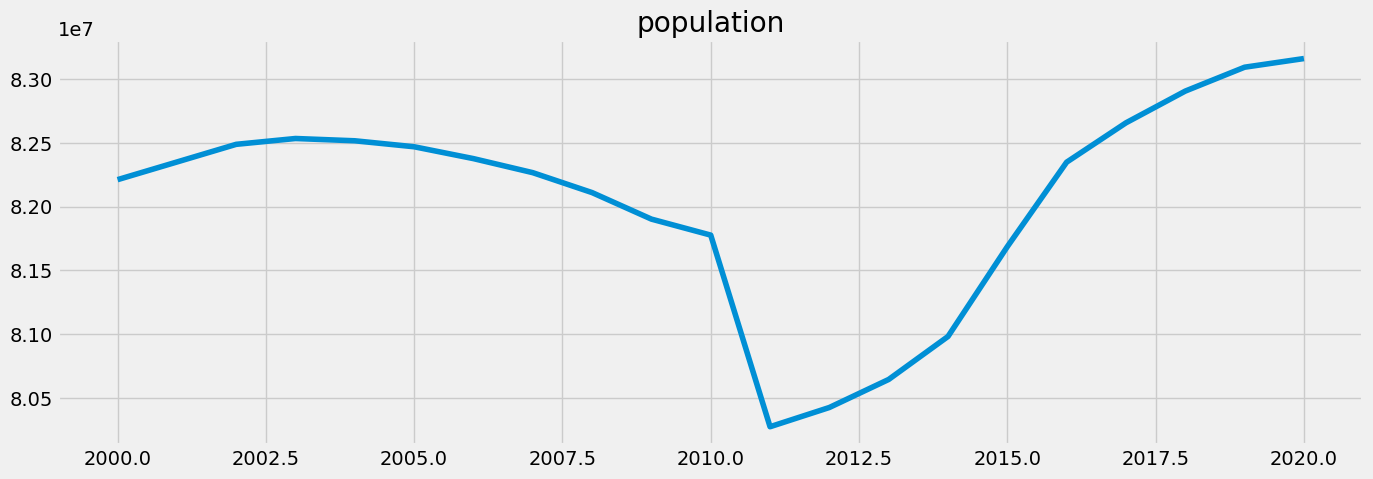

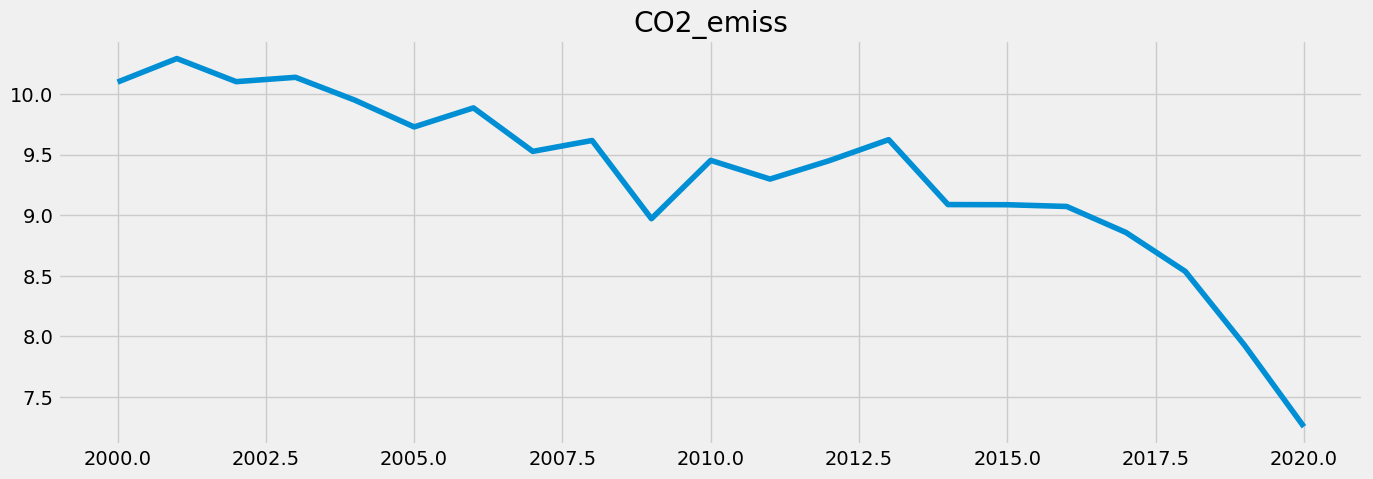

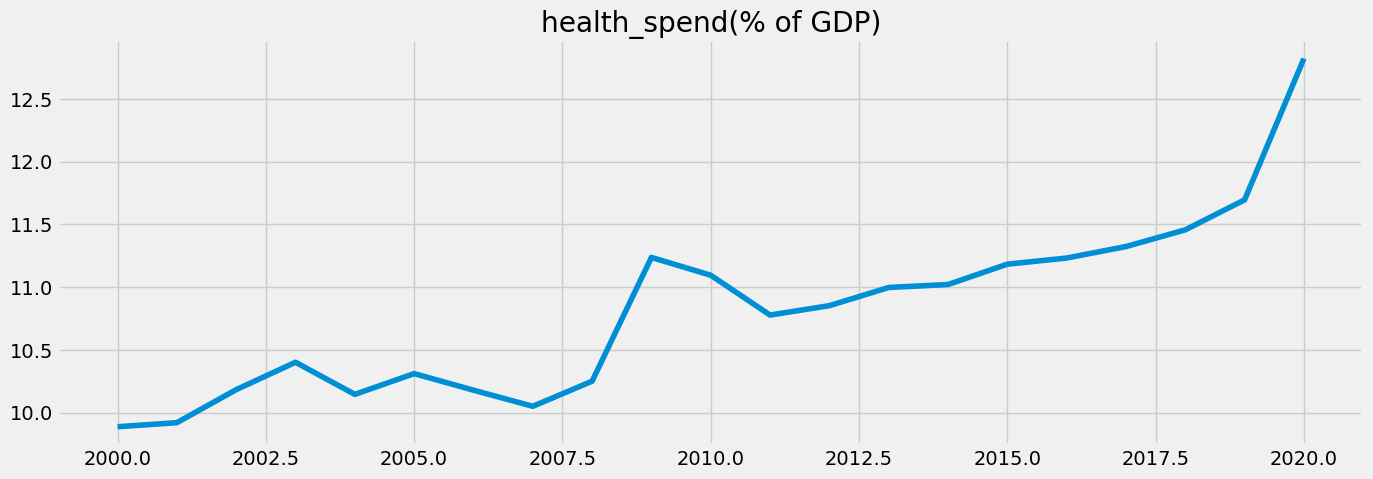

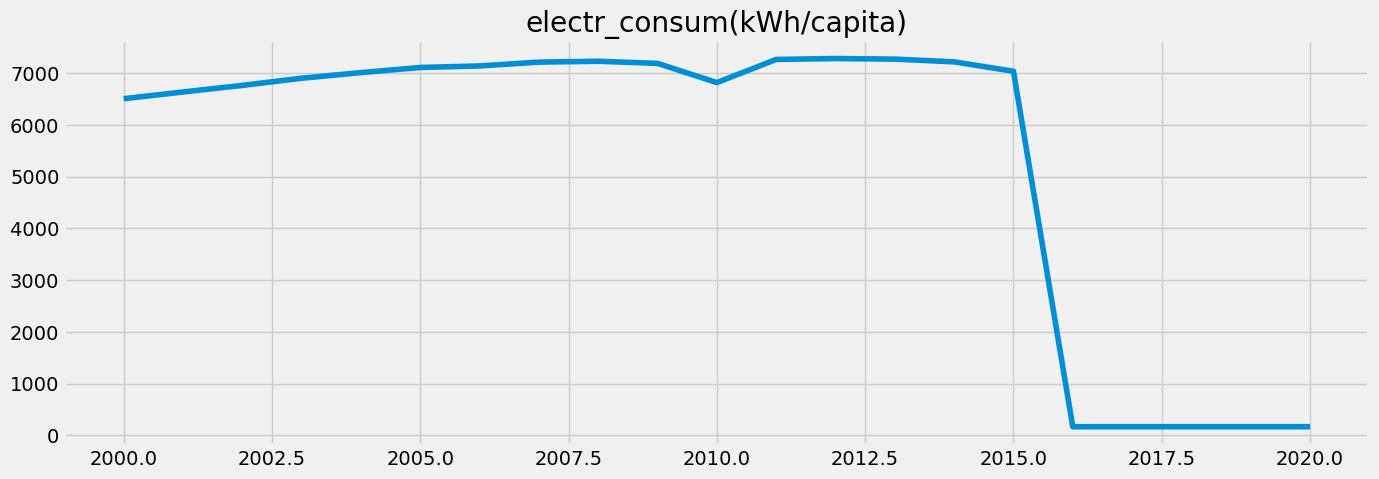

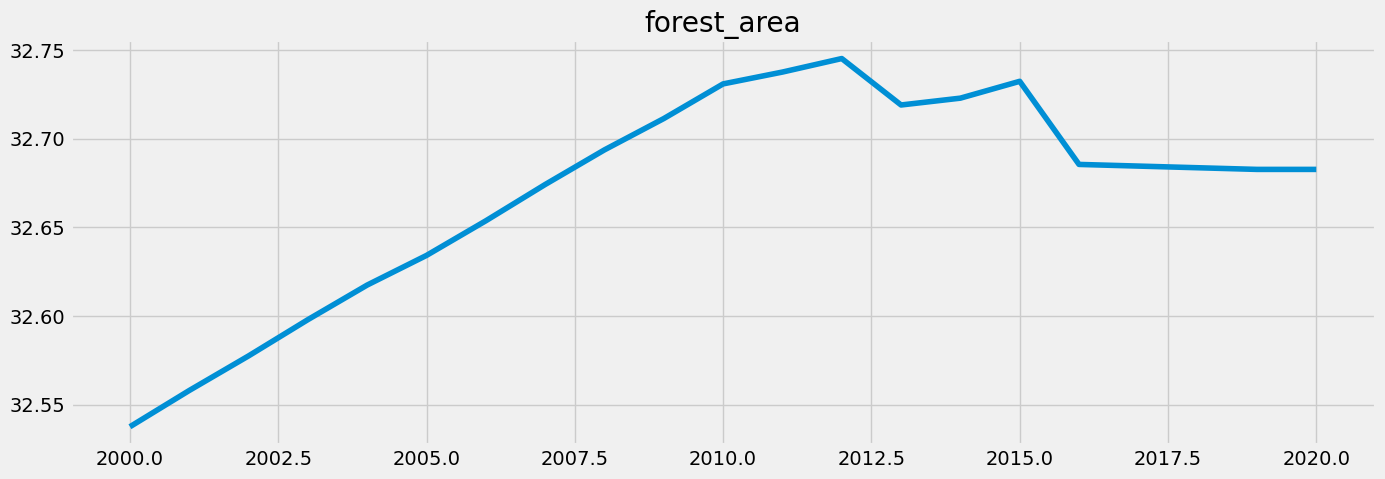

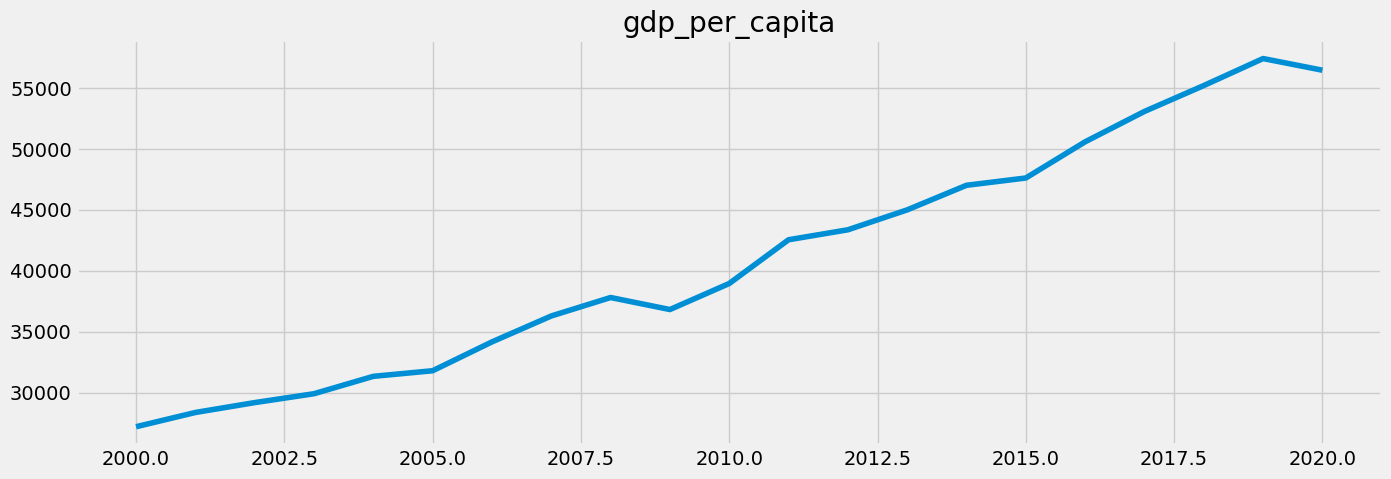

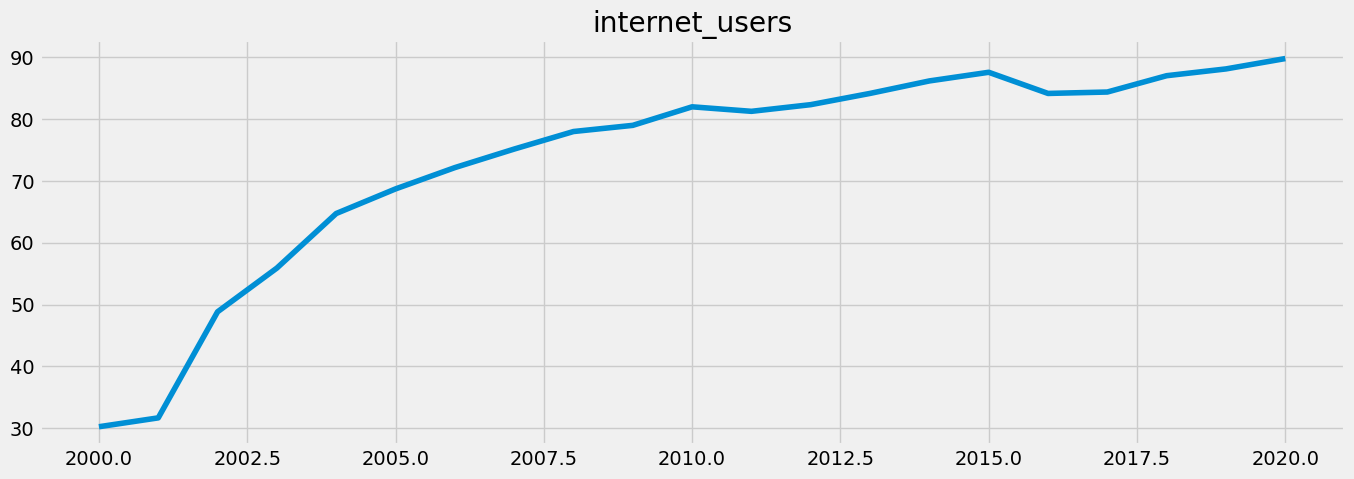

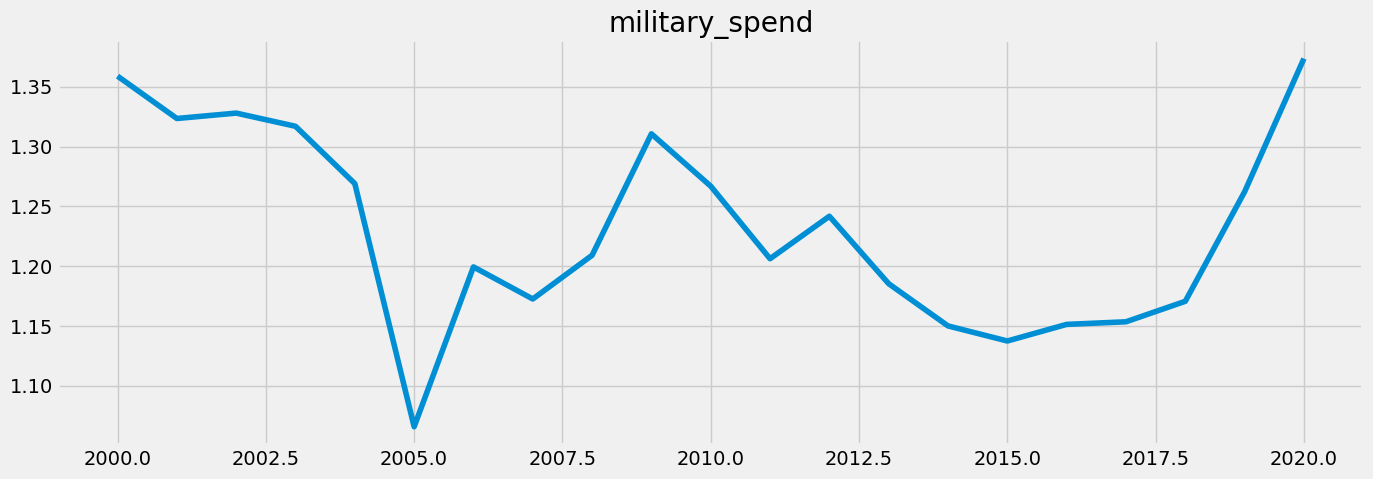

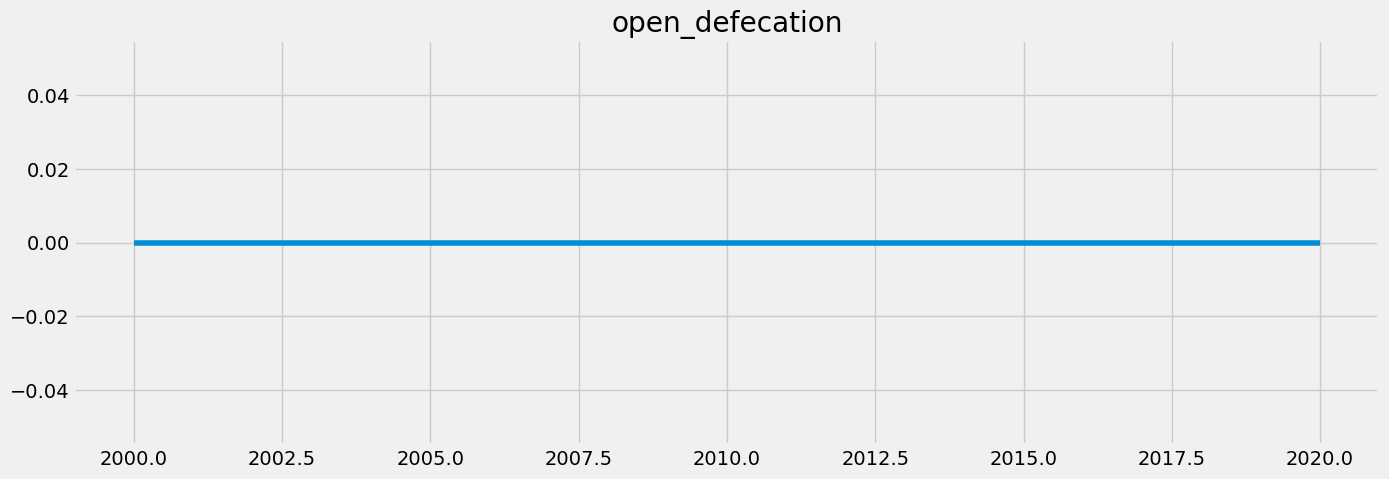

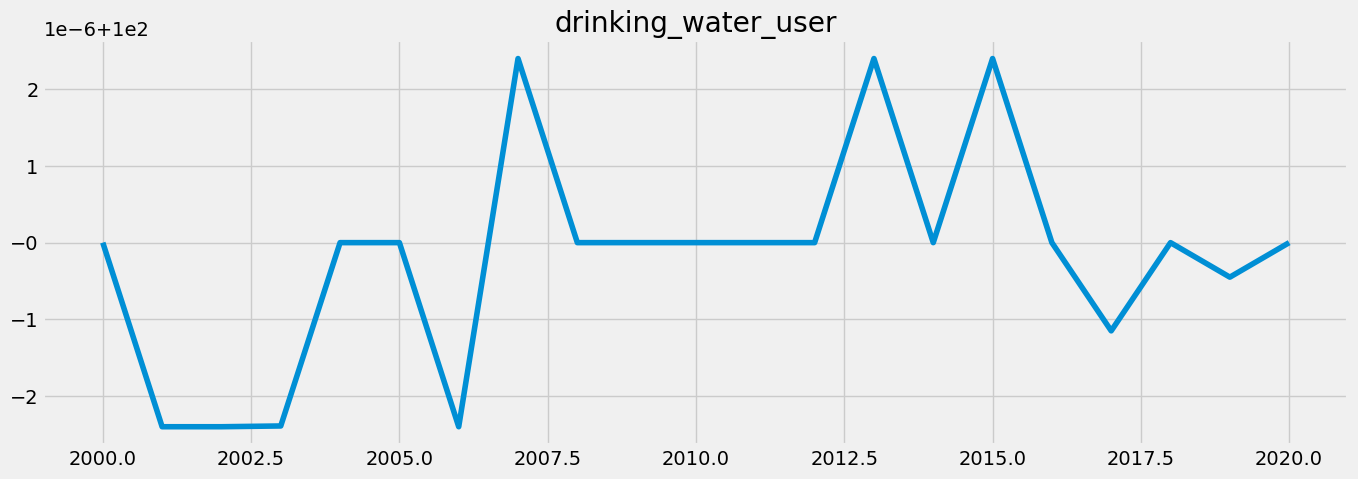

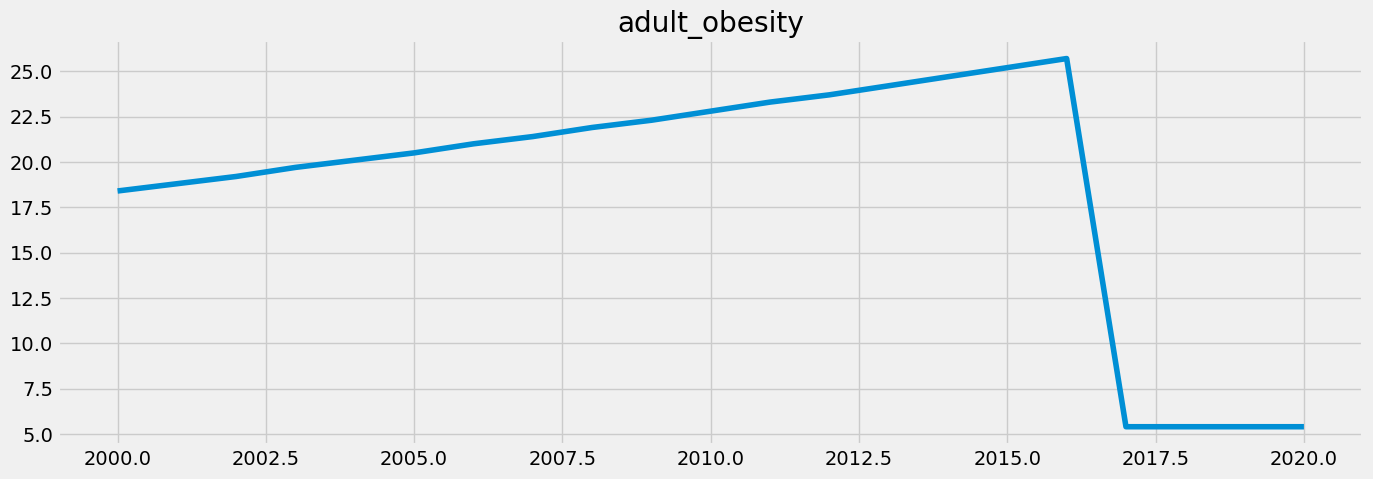

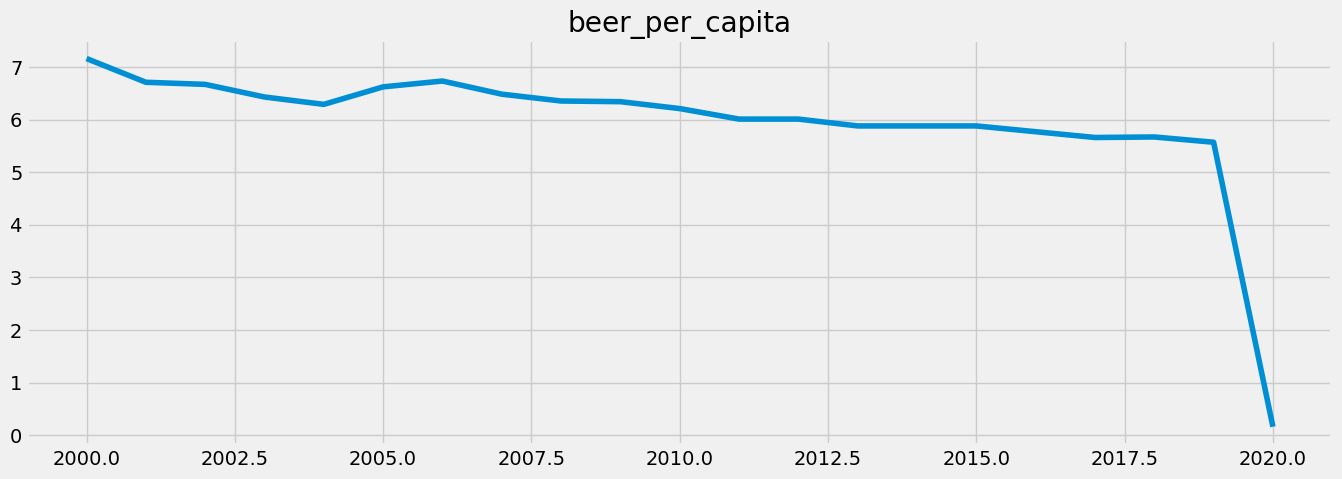

In [19]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

for column in df_germany.columns:
    plt.figure(figsize=(15,5), dpi=100)
    plt.plot(df_germany[column])
    plt.title(column)

I wonder how drinking_water_user can have negative values. Also wondering why adult obesity has a strong cut in 2016, as well as electric power consumption. 
I am not sure if i can trust the data. 

### 5. Dickey-Fuller test to check for stationarity / Testing for Stationarity

my hypothesis "The more internet users, the higher the life expectancy".

Null Hypothesis: There is no relationship between the number of internet users and life expectancy.

In [20]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why I need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_albania['life_expect'])

Dickey-Fuller Stationarity test:
Test Statistic                  2.893719
p-value                         1.000000
Number of Lags Used             8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


I am using a significance level of 5 percent. When I  look at the “Critical Value (5%)” in the results, it has a value of -3.154972. This is much smaller than the test statistic, which is 2.893719, which 
means that I can’t reject the null hypothesis.

What does this mean? That there is a unit root in the data, and the data is non-stationary.

### 6. Stationarizing the Data

In [22]:
df.head()

,name,continent,least_developed,life_expect,population,CO2_emiss,health_spend(% of GDP),electr_consum(kWh/capita),forest_area,gdp_per_capita,internet_users,military_spend,open_defecation,drinking_water_user,adult_obesity,beer_per_capita,life_exp_category
year,,,,,,,,,,,,,,,,,
2000,Albania,Europe,0,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431,Middle Life Expectancy
2001,Albania,Europe,0,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995,Middle Life Expectancy
2002,Albania,Europe,0,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697,Middle Life Expectancy
2003,Albania,Europe,0,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830,Middle Life Expectancy
2004,Albania,Europe,0,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617,High Life Expectancy


In [23]:
#creating a sub df 
sub_df_albania = df_albania['life_expect']

In [24]:
sub_df_albania.head()

year
2000    73.955
2001    74.288
2002    74.579
2003    74.828
2004    75.039
Name: life_expect, dtype: float64

In [25]:
data_diff = sub_df_albania - sub_df_albania.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [26]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [27]:
data_diff.head()

year
2001    0.333
2002    0.291
2003    0.249
2004    0.211
2005    0.189
Name: life_expect, dtype: float64

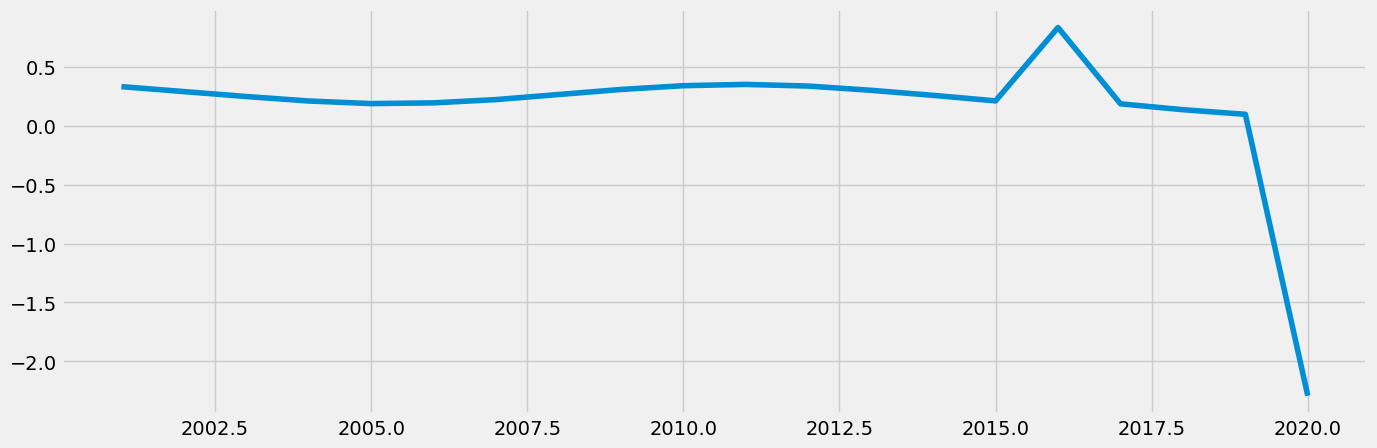

In [29]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [30]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  0.808385
p-value                         0.991770
Number of Lags Used             8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [39]:
data_diff_2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [40]:
data_diff_2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

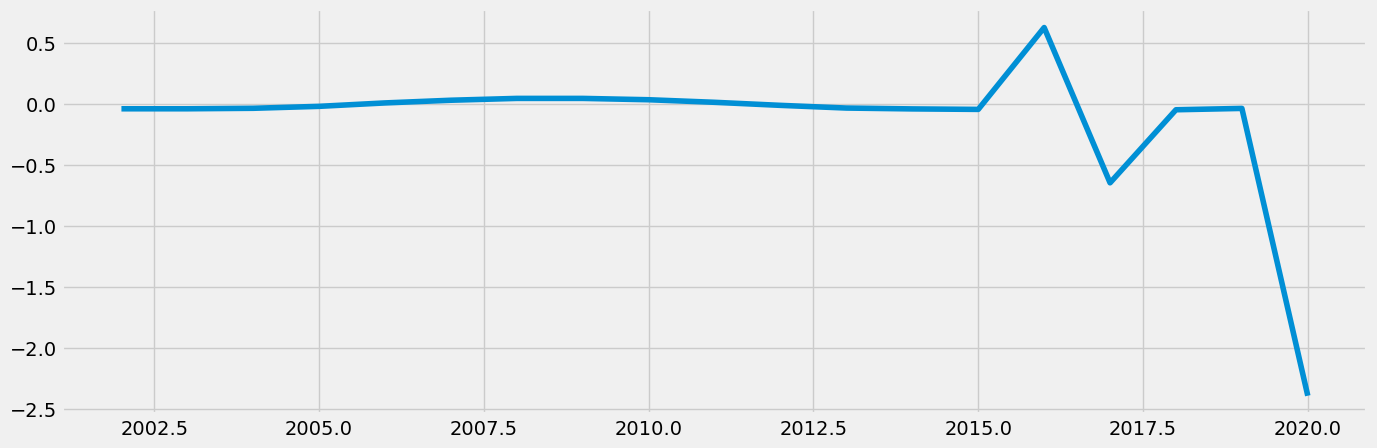

In [41]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [42]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.463127
p-value                         0.551667
Number of Lags Used             7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [43]:
data_diff_3 = data_diff_2 - data_diff_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [44]:
data_diff_3.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

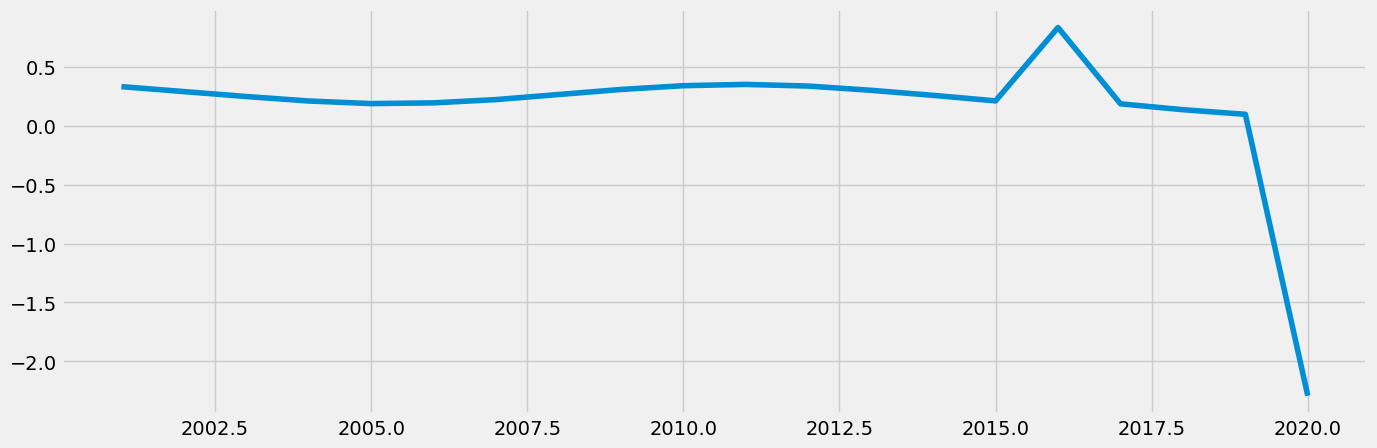

In [37]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [45]:
dickey_fuller(data_diff_3)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.639556
p-value                         0.462493
Number of Lags Used             7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [47]:
data_diff_4 = data_diff_3 - data_diff_3.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [48]:
data_diff_4.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

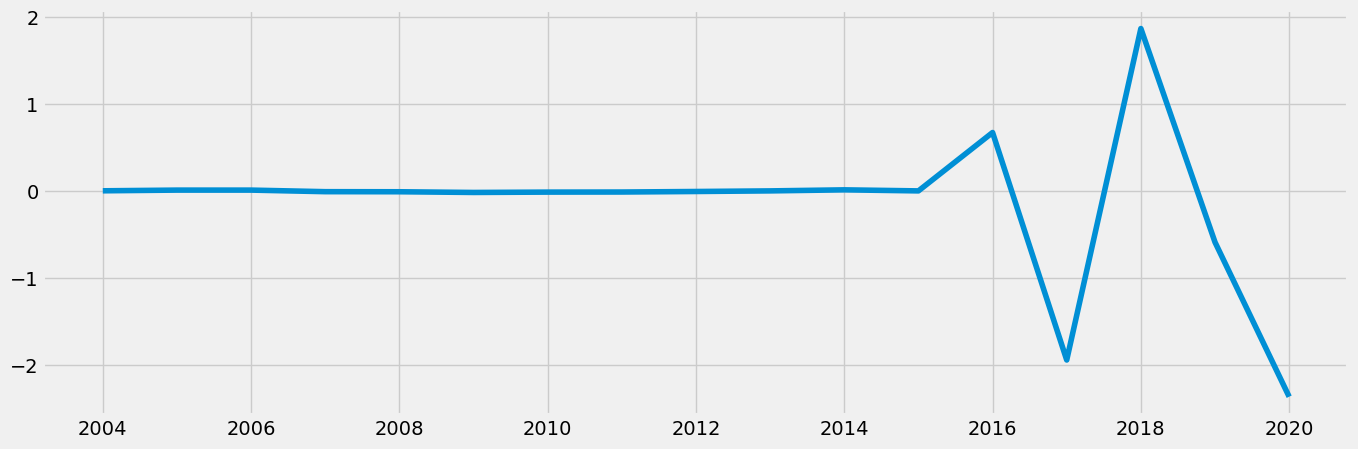

In [49]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_4)

In [50]:
dickey_fuller(data_diff_4)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.190400
p-value                         0.209748
Number of Lags Used             6.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [51]:
data_diff_5 = data_diff_4 - data_diff_4.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [52]:
data_diff_5.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

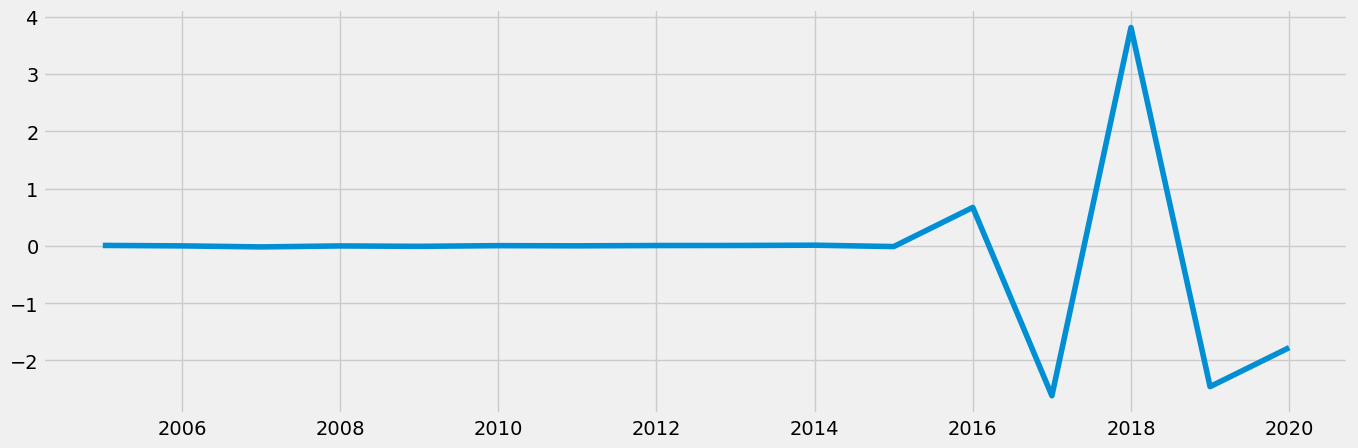

In [53]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_5)

In [54]:
dickey_fuller(data_diff_5)

Dickey-Fuller Stationarity test:
Test Statistic                -0.277598
p-value                        0.928618
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


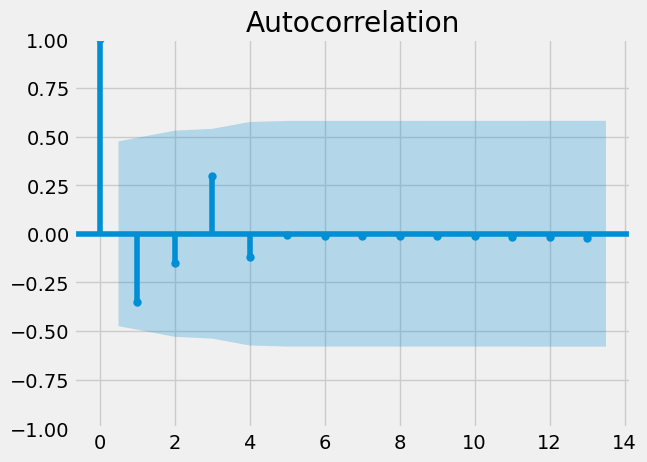

In [58]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff_4)
plt.show()